# Vehicle Insurance

## problem statement

### The aim of this project is to predict the vehicle insurance claim amount using machine learning.
Based on customer details such as age, income, vehicle type, premium amount, and dependents, the system estimates the expected insurance claim value.

This helps insurance companies reduce manual work, save time, and make accurate decisions using data-driven predictions.

## import libraries



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')

## Load the Dataset

In [19]:
data = pd.read_csv("VehicleInsuranceData.csv")

 ## Data Understanding 

### Column Names

In [20]:
data.columns

Index(['Unnamed: 0', 'clv', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

### First 5 Rows

In [21]:
data.head()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,4,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,5,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Last 5 Rows

In [22]:
data.tail()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
8625,9129,4100.398533,No,Premium,College,Employed,F,47761,Suburban,Single,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
8626,9131,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
8627,9132,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8628,9133,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
8629,9134,2611.836866,No,Extended,College,Unemployed,M,0,Suburban,Single,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


### Dataset Shape

In [23]:
data.shape

(8630, 22)

### Statistical Summary

In [24]:
data.describe()

,Unnamed: 0,clv,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount
count,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000
mean,4560.576825,6725.281515,37586.405794,91.677057,15.084473,48.004287,0.389108,3.020626,427.131607
std,2637.448711,3934.876313,30453.838594,32.648209,10.048979,27.880693,0.920491,2.445994,282.722326
min,1.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2280.250000,3858.177183,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,268.881398
50%,4547.500000,5569.220419,33817.000000,81.000000,14.000000,48.000000,0.000000,2.000000,376.880363
75%,6852.750000,8456.408530,62250.750000,108.000000,23.000000,71.000000,0.000000,4.000000,542.400000
max,9134.000000,21235.445570,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Dataset information

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     8630 non-null   int64  
 1   clv                            8630 non-null   float64
 2   Response                       8630 non-null   object 
 3   Coverage                       8630 non-null   object 
 4   Education                      8630 non-null   object 
 5   EmploymentStatus               8630 non-null   object 
 6   Gender                         8630 non-null   object 
 7   Income                         8630 non-null   int64  
 8   Location.Code                  8630 non-null   object 
 9   Marital.Status                 8630 non-null   object 
 10  Monthly.Premium.Auto           8630 non-null   int64  
 11  Months.Since.Last.Claim        8630 non-null   int64  
 12  Months.Since.Policy.Inception  8630 non-null   i

## Data Preprocessing

### Check Missing Values

In [26]:
data.isnull().sum()

Unnamed: 0                       0
clv                              0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location.Code                    0
Marital.Status                   0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Total.Claim.Amount               0
Vehicle.Class                    0
Vehicle.Size                     0
dtype: int64

In [27]:
data.fillna(data.mean(numeric_only=True), inplace=True)

data.fillna(method='ffill', inplace=True)

### Check Duplicate Records

In [28]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)


### Drop Unnecessary Column

In [29]:
data.drop(['ID'], axis=1, inplace=True, errors='ignore')


## Feature Engineering / Transformation

In [30]:
data['Premium_to_Income'] = data['Monthly.Premium.Auto'] / (data['Income'] + 1)


### Convert Categorical → Numerical

In [31]:
data = pd.get_dummies(data, drop_first=True)

## Feature Selection

### Independent & Dependent Variables

In [32]:
X = data.drop('Total.Claim.Amount', axis=1)   
y = data['Total.Claim.Amount']            

In [33]:
print(data.columns)

Index(['Unnamed: 0', 'clv', 'Income', 'Monthly.Premium.Auto',
       'Months.Since.Last.Claim', 'Months.Since.Policy.Inception',
       'Number.of.Open.Complaints', 'Number.of.Policies', 'Total.Claim.Amount',
       'Premium_to_Income', 'Response_Yes', 'Coverage_Extended',
       'Coverage_Premium', 'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed', 'Gender_M',
       'Location.Code_Suburban', 'Location.Code_Urban',
       'Marital.Status_Married', 'Marital.Status_Single',
       'Policy.Type_Personal Auto', 'Policy.Type_Special Auto',
       'Policy_Corporate L2', 'Policy_Corporate L3', 'Policy_Personal L1',
       'Policy_Personal L2', 'Policy_Personal L3', 'Policy_Special L1',
       'Policy_Special L2', 'Policy_Special L3', 'Renew.Offer.Type_Offer2',
       'Renew.Offer.Type_Offer3', 'Renew.Offer.T

In [34]:
feature_names = X.columns

pickle.dump(feature_names, open("feature_names.pkl", "wb"))


NameError: name 'pickle' is not defined

## Feature Scaling

### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## Model Selection

### Import Required Libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
lr_acc = r2_score(y_test, y_pred_lr)

print("Linear Regression Accuracy (R2):", lr_acc)


Linear Regression Accuracy (R2): 0.7846093863970317


### Support Vector Regression

In [ ]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)
svr_acc = r2_score(y_test, y_pred_svr)

print("SVR Accuracy (R2):", svr_acc)


SVR Accuracy (R2): 0.2557375804145605


Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X_scaled)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

poly_lr = LinearRegression()
poly_lr.fit(X_train_p, y_train_p)

y_pred_poly = poly_lr.predict(X_test_p)
poly_acc = r2_score(y_test_p, y_pred_poly)

print("Polynomial Regression Accuracy (R2):", poly_acc)


Polynomial Regression Accuracy (R2): -0.8080509602715535


### Decision Tree Regression

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
dt_acc = r2_score(y_test, y_pred_dt)

print("Decision Tree Accuracy (R2):", dt_acc)


Decision Tree Accuracy (R2): 0.7333165960021875


### Random Forest Regression

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_acc = r2_score(y_test, y_pred_rf)

print("Random Forest Accuracy (R2):", rf_acc)


Random Forest Accuracy (R2): 0.8392000739081897


### ACCURACY COMPARISON GRAPH

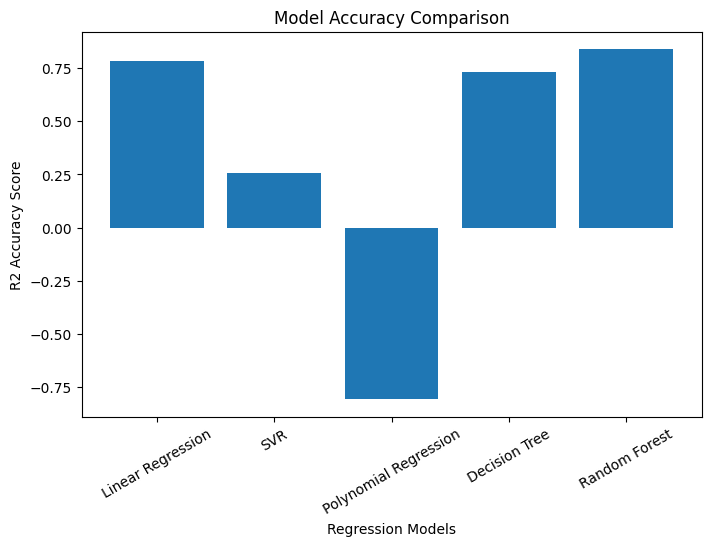

In [ ]:
models = ['Linear Regression', 'SVR', 'Polynomial Regression',
          'Decision Tree', 'Random Forest']

accuracies = [lr_acc, svr_acc, poly_acc, dt_acc, rf_acc]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.xlabel("Regression Models")
plt.ylabel("R2 Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()


### BEST MODEL SELECTION

In [ ]:
best_model = models[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print("Best Model:", best_model)
print("Best Accuracy (R2):", best_accuracy)


Best Model: Random Forest
Best Accuracy (R2): 0.8392000739081897


In [ ]:
import pickle

# Save the trained model
pickle.dump(rf, open("best_model.pkl", "wb"))

# Save the scaler (you already did this, but ensure it's the correct scaler)
pickle.dump(scaler, open("scaler.pkl", "wb"))

# Save feature names (important for aligning new data)
pickle.dump(feature_names, open("feature_names.pkl", "wb"))


In [ ]:
# Load objects
scaler = pickle.load(open("scaler.pkl", "rb"))
model = pickle.load(open("best_model.pkl", "rb"))
feature_names = pickle.load(open("feature_names.pkl", "rb"))

# Prepare new input (after one-hot encoding & alignment)
input_scaled = scaler.transform(input_df[feature_names])
prediction = model.predict(input_scaled)

print("Predicted Insurance Claim Amount:", prediction[0])


Predicted Insurance Claim Amount: 168.06996252000002


In [ ]:
input_df = pd.DataFrame(
    np.zeros((1, len(feature_names))),
    columns=feature_names
)

In [35]:
input_dict = {
    'Age': [35],
    'Income': [50000],
    'Monthly.Premium.Auto': [150],
    'Dependents': [2],
    'Gender': ['Male'],  # Categorical
    'Vehicle_Type': ['Sedan'],  # Example categorical
    # Add other features if needed
}

input_df = pd.DataFrame(input_dict)

In [36]:
input_df = pd.get_dummies(input_df, drop_first=True)

In [37]:
for col in feature_names:
    if col not in input_df.columns:
        input_df[col] = 0 

In [38]:
input_df = input_df[feature_names]

In [ ]:
import pickle

# Load the model
model = pickle.load(open("best_model.pkl", "rb"))
print(type(model))

# Load the scaler
scaler = pickle.load(open("scaler.pkl", "rb"))
print(type(scaler))


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
<class 'sklearn.preprocessing._data.StandardScaler'>


In [ ]:
# --- Step 4: Scale and predict ---
input_scaled = scaler.transform(input_df)
prediction = model.predict(input_scaled)

print("Predicted Insurance Claim Amount:", prediction[0])

Predicted Insurance Claim Amount: 168.06996252000002


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Perform 5-fold cross-validation on the best model (Random Forest)
cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean CV R2 Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

# Additional metrics on the test set
y_pred_rf = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Cross-Validation R2 Scores: [0.82539628 0.83962624 0.83110863 0.84837499 0.84631378]
Mean CV R2 Score: 0.8381639832818536
Standard Deviation: 0.008781963189282347
MAE: 74.32286345560256
MSE: 13726.870531961371
RMSE: 117.16172810248818


In [ ]:
import pickle
import os

# Check if files exist
files = ["best_model.pkl", "scaler.pkl", "feature_names.pkl"]
for file in files:
    if os.path.exists(file):
        print(f"{file} exists.")
    else:
        print(f"{file} does not exist.")

# Load and verify
try:
    model = pickle.load(open("best_model.pkl", "rb"))
    scaler = pickle.load(open("scaler.pkl", "rb"))
    feature_names = pickle.load(open("feature_names.pkl", "rb"))
    print("Model type:", type(model))
    print("Scaler type:", type(scaler))
    print("Feature names length:", len(feature_names))
    print("All files loaded successfully.")
except Exception as e:
    print("Error loading files:", e)

best_model.pkl exists.
scaler.pkl exists.
feature_names.pkl exists.
Model type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Scaler type: <class 'sklearn.preprocessing._data.StandardScaler'>
Feature names length: 48
All files loaded successfully.
